# `Refactoring` optimización y cobertura de portafolios en Python

Quiero refectorizar el código anterior en bloques:
* constructor
* carga de datos
* computo de datos

Voy a escribir las lineas lo que después quiero construir:

In [ ]:
"""
escribiré una clase que se lamará `hedge_manager` 
y la guardaré en el archivo 'stream_classes'

Argumentos:
    -ric : valor a cubrir
    -benchmark : mercado a operar
    -hendge_rics : universo valores para optimizar
    -delta : dinero a cubrir
"""
hedge = stream_classes.hedge_manager(ric, benchmark, hendge_rics, delta)

In [ ]:
"""
Load imputs. 
Usaré la función compute_beta() para cargar beta y calcular 
el beta en dólares. Además poder imprimir si quiero los datos 
calculados. Calculará los betas de cada valor de las coberturas
e imprimirá los valores.
"""
hedger.load_inputs(bool_print=True)

In [ ]:
"""
Hacer los cálculos de algortimo de cobertura.
Tansformar en matrices e invertir y calcular el delta
de cobertura y el beta de cobertura para ver que si cubrimos
lo que queremos cubrir. Imprimir opcionamente los datos.
"""
hedger.compute(bool_print=True)

**MI CÓDIGO A ENCAPSULAR**

In [ ]:
import scipy
import importlib
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, chi2, linregress
# our own files an reload
import stream_classes
import stream_functions
importlib.reload(stream_classes)
importlib.reload(stream_functions)

# imput parameters
ric = "BBVA.MC"
benchmark = "^STOXX"
hedge_rics = ['SAN.MC', 'REP.MC']
delta_0 = 10


def compute_beta(ric, benchmark, bool_print=False):
    # portfolio beta: beta_0
    capm = stream_classes.capm_manager(ric, benchmark)
    capm.load_timeseries()
    capm.compute()
    # 
    if bool_print:
        print('------')
        print(capm)
    beta = capm.beta
    return beta


# computa beta_0 BBVA.MC
beta_0 = compute_beta(ric, benchmark, bool_print=False)
# beta en dólares BBVA.MC
beta_usd = beta_0 * delta_0

print('---------------')
print('Imput portfolio')
print('---------------')
print('Delta mnUSD for ' + ric + ' is ' + str(delta_0))
print('Beta for ' + ric + ' vs ' + benchmark + ' is ' + str(beta_0))
print('Beta mnUSD for ' + ric + ' vs ' + benchmark + ' is ' + str(beta_usd))


# compute betas for the hedges
shape = [len(hedge_rics), 1]     # quiero una matriz 2*1
betas = np.zeros(shape)          # quiero un vector vertical de 2*1
print('-------------')
print('Input hedges:')
print('-------------')
# a cada vector le calculo el beta para cada ric de cobertura
counter = 0
for i in hedge_rics:
    beta = compute_beta(i, benchmark)
    print('Beta_' + str(counter + 1) + ' for hedge[' + str(counter) + '] ' +
          i + ' vs ' + benchmark + ' is ' + str(beta))
    # lleno mi vector de betas
    betas[counter] = beta
    counter += 1

deltas = np.ones(shape)

# genero matriz de dos renglones deltas, betas
mtx = np.transpose(          # traspuesta
        np.column_stack(     # acomodo como columnas
            (deltas, betas)  # relleno mis columnas
        ))

targets = - np.array([[delta_0],[beta_usd]])
# inversa de la matriz mtx
optimal_hedge = np.linalg.inv(mtx)


# cobertura óptima
optimal_hedge = np.linalg.inv(mtx).dot(targets)
hedge_delta = np.sum(optimal_hedge)
hedge_beta_usd = np.transpose(betas).dot(optimal_hedge).item()

print('-------------------')
print('Optimisation result')
print('-------------------')
print('Delta: ' + str(delta_0))
print('Beta USD: ' + str(beta_usd))
print('')
print('Hedge delta:' + str(hedge_delta))
print('Hedge beta:' + str(hedge_beta_usd))
print('--------------------')
print('Betas for the hedge:')
print('--------------------')
print(betas)
print('--------------')
print('Optimal hedge:')
print('--------------')
print(optimal_hedge)

**CONSTRUYENDO LA CLASE**

In [2]:
import scipy
import importlib
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, chi2, linregress
# our own files an reload
import stream_classes
import stream_functions
importlib.reload(stream_classes)
importlib.reload(stream_functions)



class hedge_maneger():
    
    def __init__(self, ric, benchmark, hedge_rics, delta):
        self.ric = ric
        self.benchmark = benchmark
        self.hedge_ric = hedge_rics
        self.delta = delta
        self.dataframe= pd.DataFrame()            # quiero un df con el resumen de la cobertura
        self.hedge_delta = None                   # para cálculo del algortimo
        self.hedge_beta_usd = None                # para cálculo del algortimo
    
    def load_inputs(self, bool_print=False):
        self.beta = stream_functions.compute_beta( # llamo función creada para calcular beta
            self.ric, self.benchmark
        )
        self.beta_usd = self.beta * self.delta
        hedge_betas = [                           # Calcula betas de cada valor de las coberturas
            stream_functions.compute_beta(i, self.benchmark) for i in self.hedges_rics]
        self.dataframe['ric'] = self.hedges_rics  # cargando columnas de mi df de salida
        self.dataframe['deta'] = hedge_betas      # cargando columnas de mi df de salida
        if bool_print:
            print('---------------')
            print('Imput portfolio')
            print('---------------')
            print('Delta mnUSD for ' + self.ric + ' is ' + str(self.delta))
            print('Beta for ' + self.ric + ' vs ' + self.benchmark + ' is ' + str(self.beta))
            print('Beta mnUSD for ' + self.ric + ' vs ' + self.benchmark + ' is ' + str(self.beta_usd))
            print('---------------')
            print('Input hedges:')
            print('-------------')
            # a cada vector le calculo el beta para cada ric de cobertura
            for i in range(self.dataframe.shape[0]):
                print('Beta for hedge[ ' + str(i) + '] = ' + self.dataframe['ric'][n] \
                      + ' vs ' + self.benchmark + ' is ' + str(self.dataframe['beta'][n]))
    
    def compute():
        shape = [len(self.hedge_rics), 1]           # dimensión de las matrices que voy a usar
        betas = np.array(self.dataframe['beta']).reshape(shape) # da forma igual a matriz shape
        deltas = np.ones(shape)                     # matriz de unos de la forma shape
        targets = - np.array([[self.delta],[self.beta_usd]])
        mtx = np.transpose(                         # traspuesta
                np.column_stack(                    # acomodo como columnas
                    (deltas, betas)))               # relleno mis columnas
        optimal_hedge = np.linalg.inv(mtx).dot(targets)
        self.dataframe['delta'] = optimal_hedge
        self.dataframe['beta_usd'] = betas * optimal_hedge # dot of matrix
        self.hedge_delta = np.sum(self.dataframe['delta'])
        self.hedge_beta_usd = np.sum(self.dataframe['beta_usd'])
        if bool_print:
            print('-------------------')
            print('Optimisation result')
            print('-------------------')
            print('Delta: ' + str(delta_0))
            print('Beta USD: ' + str(beta_usd))
            print('')
            print('Hedge delta:' + str(hedge_delta))
            print('Hedge beta:' + str(hedge_beta_usd))
            print('--------------------')
            print('Betas for the hedge:')
            print('--------------------')
            print(betas)
            print('--------------')
            print('Optimal hedge:')
            print('--------------')
            print(optimal_hedge)

**Guardo class hedge_maneger() en `stream_classes.py`**

In [9]:
import importlib
# our own files an reload
import stream_classes
import stream_functions
importlib.reload(stream_classes)
importlib.reload(stream_functions)

# imput parameters
ric = "BBVA.MC"
benchmark = "^STOXX"
hedge_rics = ['SAN.MC', 'REP.MC']
delta = 10

hedge = stream_classes.hedge_maneger(ric, benchmark, hedge_rics, delta)
hedge.load_inputs(bool_print=True)
hedge.compute(bool_print=True)

---------------
Imput portfolio
---------------
Delta mnUSD for BBVA.MC is 10
Beta for BBVA.MC vs ^STOXX is 1.3527
Beta mnUSD for BBVA.MC vs ^STOXX is 13.527000000000001
---------------
Input hedges:
-------------
Beta for hedge[ 0] = SAN.MC vs ^STOXX is 1.4513
Beta for hedge[ 1] = REP.MC vs ^STOXX is 1.3007
-------------------
Optimisation result
-------------------
Delta: 10
Beta USD: 13.527000000000001

Hedge delta:-10.0
Hedge beta:-13.527000000000005
--------------------
Betas for the hedge:
--------------------
[[1.4513]
 [1.3007]]
--------------
Optimal hedge:
--------------
[[-3.45285525]
 [-6.54714475]]


In [11]:
optimal_hedge = hedge.dataframe
optimal_hedge

,ric,beta,delta,beta_usd
0,SAN.MC,1.4513,-3.452855,-5.011129
1,REP.MC,1.3007,-6.547145,-8.515871


**Preguntas**

¿Las coberturas son diarías?
No tienen porqué serlo. Uno puede tomar rendimientos diaríos; por ejemplo el beta que hemos calculado arriba son 5 años de datos, del 2015 al 2020. Día tras día calcular rendimientos diarios no sognifica que tengas que cambiar diario. 

Muchas veces puedes tener 6 meses (120 puntos 20*6 días de trading) si avanzo un día voy a tener 119 días que son iguales y sólo uno que es diferente. Entonces tengo una diferencia de 1/120=0.00833 de 0.8% de diferencia y eso no es suficiente. Entonces yo podría calcular betas con rendimientos diario, recalibrar mis betas diariamente, pero sólo recalibrar mi porfolio cada semana, dos semanas o cada mes; dependerá de cuán costoso es mober mi portafolio (hay que pensar en los costos de transacción, voy a intentar comprar y vender la menos de veces posibles sin sacrificar la reactividad de mi portafolio).

## CAPM investment strategies and fund classification ['Portafolios de inversión']


![4.png](img/04.png)


Queremos entender los tres riesgos
* Riesgo en $\varepsilon$ : es el error en aproximación (que se puede diversificar).
* Riesgo en $\alpha$ : es el riesgo de mercado.
* Riesgo en $\beta$ : es el riesgo inherente al activo.

Si yo considero la teoría de mercados eficientes **EMT**:  
>* significa que estoy considerando que no hay alpha $\alpha=0$

Si estoy jugando con la **CAPM (Capital Asset Pricing Mode)** + **ETM (Teoría de mercados eficientes)**:
>* significa que sólo tengo dos componentes de riesgo: $\varepsilon$ y $\beta$.
>* El $\varepsilon$ es un error que cuando tomo la esperanza $\varepsilon$ tiene E[$\varepsilon$]=0
>* lo que nos lleva a un problema unidemiensional **1D** : $E[r_a]=\beta E[r_M]$ del cual es único riesgo que tengo es $beta$
>
>Por lo tanto si quiero tener un portfolios completamente cubierto llibre de riesgo, necesito que beta sea cero porque esto significa que no tengo ningun riesgo en la componenete de beta

Bajo esta perspectiva, para entender **Portafolios de inversión** vamos hacerlo sólamente con alphas y betas. Todo esto está en el plano alpha y beta (no voy a tomar en cuenta el épsilon) y necesito replicar cosas.


---

**RECONSTRUYENDO ESTRATEGIAS**

**¿Cómo replico un Index tracker?**  
> * replica el rendimiento de un benchmark (puede ser un indices S&P500, BMN, Stoxx600, etc o comodities, etc)
> * para replicar necesito tener exactamente el rendimiento del mercado. 
> * Y si lo que quiero es replicar el rendimiento del mercado con mi activo $a$ necesito que $\beta= 1$ y $\alpha=0$ 
>
>
>![](img/06.png)
>
> Vemos que el  Index tracker es $beta=1$ (la estrella en amarillo) y $alpha=0$

Lo que estoy intentando hacer es: 
> $r_{a} = \alpha + \beta r_M + \varepsilon$  
>
>alpha y beta yo los conozco
>* alpha: es el rendimiento intrínsico de mi activo que de acuerdo a la teoría de mercados eficientes tiene que ser cero pero no necesariamente lo es. $\alpha$ es el rendimiento de $r_a$ que no está explicado por el mercado.
>* beta: es el rendimiento de mi activo $r_a$ que está explicado por el mercado $\beta r_M$
>
> Entonces yo me estoy quitando el $\varepsilon$rror que sólo es ruído o me supongo que el modelo es perfecto, que no hay error. Entonces estamos ahora mismo en este plano **2D** alpha-beta del dibujo.

Supongamos que uso $benchmark=STOXX50E$ eurostoxx sólo de la zona euro.  Lo hago porque son los futuros más líquidos de europa.  
Para Index tracker en STOXX50E con $\beta= 1$ y $\alpha=0$; si quiero $\beta= 1$ necesito invertir en el STOXX50E y nada mas que en el STOXX50E
> * tracker : necesito comprar los futuros de los STOXX50E
> ¿cómo lo puedo hacer para que eso vaya cambiando? los futuros son contratos que tiene una madurez, son a 6, 9 y 12 meses. Los futuros más liquidos son los futuros más cercanos a la expiración (los que van en los próximos tres meses o menos). Cuando tenemos un futuro que va a exprirar, lo que hacemos es vender los futuros de la expiración actual y con ese dinero que optengo compro futuros de la siguiente expiración. Si los futuros expiran en diciembre, cuando llegue diciembre voy a vender futuros de diciembre y recomprar futuros de marzo del siguiente año [esto se llama el **rol de futuros**].
>
> Compro futuros del STOXX50E que por definieción tiene $\beta= 1$ y $\alpha=0$

**¿Cómo replico un Asset Manager?**  

> Yo comienzo con un **Index Traker** y lo voy a modificar tantito de manera que el **beta** no cambie mucho o sea que estemos en el eje vertial azul y que me mueva hacia arriba para opteneer más alpha. es decir, yo quiero tener un performans por encima del del **Index Traker** quiero vencer al traker
>
>![](img/06.png)
>
> ¿Cuáles son los elementos de juicio que tenemos? Quiero ver qué cara tiene el STOXX50E

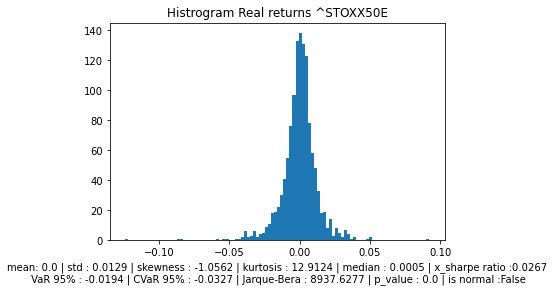

In [15]:
import importlib
import stream_classes
import stream_functions
importlib.reload(stream_functions)
importlib.reload(stream_classes)

ric = '^STOXX50E'
# compute risk metrics for real returns
jb = stream_classes.jarque_bera_test(ric)  # create object of class
jb.load_timeseries()                       # load from load_timeseries() method
jb.compute()                               # compute from compute() method
#jb.plot_timeseries()                       # plot from plot_timeseries() method
jb.plot_histogram()                        # plot from plot_histogram() method

>Me está diciendo que la media es ¿0?  
>Esto es porque está redondiado a 4 cifras, vemos que sharpe_ratio es positiva entonces la media no es cero es positiva pero redeondeado a 4 cifras significativas es cero.
>
>Yo quiero mejorar al STOXX50E. Entonces, vamos a ver **betas**:
>
>y yo se que tengo dos activos el **cac-40 [FCHI]** del indice europeo (yo se por loq ue vimos antes) yo se que son casi colineales en el sentido de que el alpha es pequeño, el beta es casi 1 y que el error es pequeño.

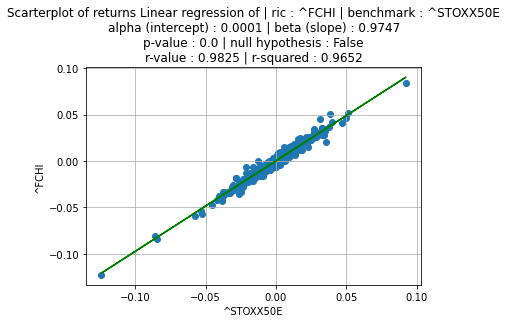

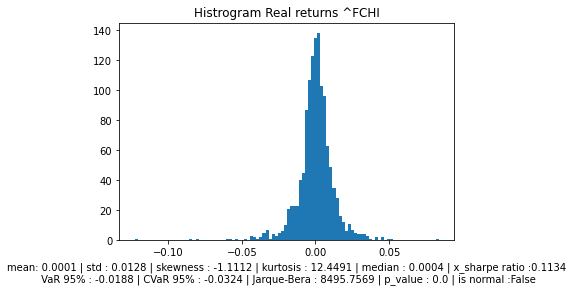

In [19]:
ric = "^FCHI"
benchmark = "^STOXX50E" 

capm = stream_classes.capm_manager(ric, benchmark)
capm.load_timeseries()
capm.compute()
capm.scatterplot()
#capm.plot_normalised()
#capm.plot_dual_axes()

ric = '^FCHI'
# compute risk metrics for real returns
jb = stream_classes.jarque_bera_test(ric)  # create object of class
jb.load_timeseries()                       # load from load_timeseries() method
jb.compute()                               # compute from compute() method
#jb.plot_timeseries()                       # plot from plot_timeseries() method
jb.plot_histogram()                        # plot from plot_histogram() method

>Tenemos 
>* r-squared : 0.9652 con este modelo se explica el 96%
>* r-value : 0.9825 correlación entre cac-40 [FCHI] y STOXX50E es del 98%, es casi el mismo.

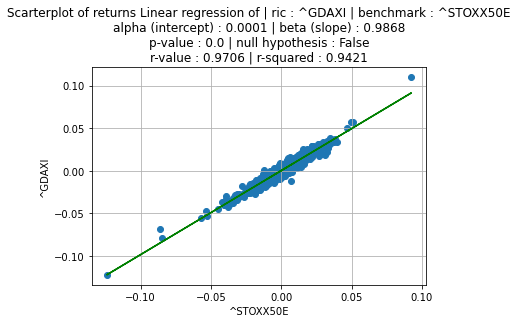

Linear regression of | ric : ^GDAXI | benchmark : ^STOXX50E
alpha (intercept) : 0.0001 | beta (slope) : 0.9868
p-value : 0.0 | null hypothesis : False
r-value : 0.9706 | r-squared : 0.9421


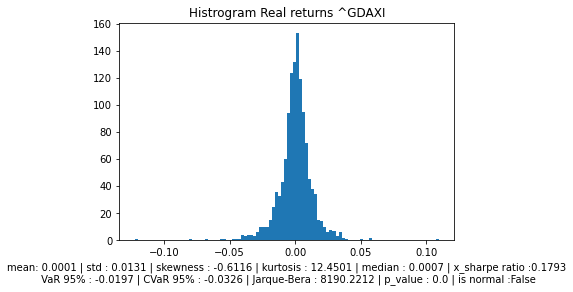

In [20]:
ric = "^GDAXI"
benchmark = "^STOXX50E" 

capm = stream_classes.capm_manager(ric, benchmark)
capm.load_timeseries()
capm.compute()
capm.scatterplot()
#capm.plot_normalised()
#capm.plot_dual_axes()
print(capm)

ric = '^GDAXI'
# compute risk metrics for real returns
jb = stream_classes.jarque_bera_test(ric)  # create object of class
jb.load_timeseries()                       # load from load_timeseries() method
jb.compute()                               # compute from compute() method
#jb.plot_timeseries()                       # plot from plot_timeseries() method
jb.plot_histogram()                        # plot from plot_histogram() method

>Tenemos 
>* r-squared : 0.9652 con este modelo se explica el 96%
>* r-value : 0.9825 correlación entre cac-40 [FCHI] y STOXX50E es del 98%, es casi el mismo.
>
>Como en los tres tenemos una correlación casi perfecta, casi uno, podemos considerar indistintamente cualquiera de los tres.
>Como gerente de portfolios voy a escoger un activo entre el **dax GDAXI** y el **cac-40 FCHI**, invertir en él en vez de invertir en el **STOXX50E** >del tal manera que yo tengo una ganacia un poquito por encima del STOXX50E
>
>![](img/06.png)
>
>En la estrella amarilla está el STOXX50E el **beta** se va a mover un porquito hacia la derecha o hacia la izquierda, pero yo quiero tener más **alpha**, yo quiero escoger el **dax GDAXI** o el **cac-40 FCHI** y ver cuál me va a dar mejor rendimientos.
>
>||GDAX|FCHI|STOXX50E|
>|-|-|-|-|
>|beta|0.9868|0.9747||
>|mean|0.0001|0.0001|0.0|
>|dev std|0.0131|0.0128|0.0129|
>|sharpe ratio |0.1793|0.1134|0.0267|
>
>* puedo escojer al cac-40 si quiero minimizar la desv std o volatilidad 0.0128 < 0.0131
>* puedo escojer al GDAX si quiero tener un mejor sharpe 0.1793 > 0.1134 [el cociente de sharpe es la ganacia media dividido por la bolatilidad >anualizada, esto me dice cuál es el rendimiento esperado por unidad de riesgo. Es una medido clásica para estudiar portafolios. Es un valor >adimensional que me dice cuál de los dos valores me da más por unidad de riesgo. En pocas palabras si el sharpe es 3, te dice que si tu augmentas el >riesgo del 1% el rendimiento esperado va a augmentar del 3%, si el sharpe es 2 aumentar el riesgo del 1% el rendimiento va a aumentar de 2% del >rendimiento esperado, por eso el sharpe más grande te da mejores capacidades de ganacia cuando aumentas el riesgo]
>* en ambos casos el beta es casi igual a 1 : |0.9868|0.9747|
>* tengo mejor rendimiento (etter return) y un mejor sharpe. GDAX > FCHI > STOXX50E
>
>El **assert maneger** diría, entonces si me dan un STOXX50E yo voy a invertir en estos dos [GDAX, cac-40] porque están mejor, son casi el mismo >activo, p ero tengo un poco más de *alpha*, rendimiento extra por encima de STOXX50E
>* el intercept es positivo en ambos casos `alpha (intercept) : 0.0001`

**¿Cómo replico un Hedge fund?**  

> Un Hedge fund quiere tener $beta=0$ que quiere decir que la única componente de riesgo en esta proyección
>
> ![4.png](img/04.png)
>
> la única ganancia o el rendimiento absoluto es $\alpha$. Alpha es ortogonal al rendimiento del mercado $r_M$ y al error $\varepsilon$. Osea que me va a dar un rendimiento asegurado indeendientemente de las condiciones del mercado. Por eso se llama así Hedge fund, porque es un fondo de cobertua respecto el mercado y ganas dinero con alpha puro.
>
> Entonces si yo quiero alpha puro necesito : $\beta=0$ y $\alpha > 0$
>
> Si mi `benchmark=STOXX50E` tengo que encontrar activos 
>* cuya `hipótesis nula sea True`, 
>* y que sea un `beta=0` osea que no haya componente de mercado
>
> En este ejemplo voy a considerar el `Euro~Dolar` **EURUSD=X** respecto al eurostock **STOXX50E**

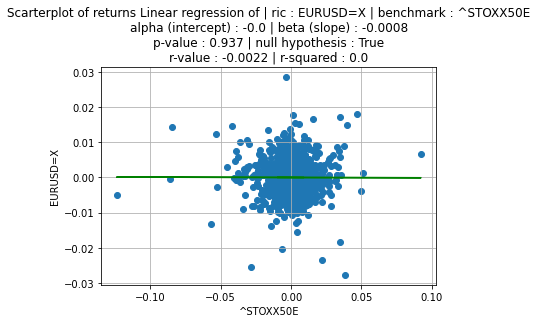

In [22]:
ric = "EURUSD=X"
benchmark = "^STOXX50E" 

capm = stream_classes.capm_manager(ric, benchmark)
capm.load_timeseries()
capm.compute()
capm.scatterplot()

> Podemos ver que la hipótesis nula dice **True**, es decir el beta es muy pequeño $\beta=-0.0008$ y vemos que no tiene pinta de seguir una regresión lineal.
> * entonces sólo tengo dos componentes $\varepsilon$ y $\alpha$
> Entonces si me dicen "dame un activo con un beta=0 aquí está. Ahora el problema el `intercept (alpha) = 0` entonces muy problablemente el $\beta=-0$ junto al $\alpha=0$  significa que toda la componente que tengo es epsilon, en otras palabras es absurdo tratar de hacer el **CAPM** con respecto al **STOXX50E** del activo **EURUSD=X**.
>
> Un fondo dirá yo quiero invertir en el EURUSD=X, si el EURUSD=X sube compran, si el EURUSD=X baja venden de manera que tengan una ganacia positiva tal que este rendimiento $r_a$ sea positivo, entonces aquí $r_{a} = \alpha + \beta r_M + \varepsilon$   el alpha quiero que sea positivo, entonces cuando va para arriba compro cuando va para abajo vendo y este es el error nada más.
>
> Entonces, cuando tomo la $E$speranza de esto $r_{a} = \alpha + \beta r_M + \varepsilon$ , si esto $\varepsilon$  es cero y esto $\beta r_M$ entonces el rendimiento del activo es exactamente $\alpha$   
>
> No estoy tomando en cuanto la teoría de mercados eficientes. El **Hedge fun** que trabaja con alphas, que quiere generar alphas como warrent buffet dice "la teoría de mercados eficientes es falsa". Hay que invertir en activos que tengan alpha, el alpha si existe. Estoy suponiendo que el alpha no existe cuando calculo betas, pero un **Hedge fun** vive y muere por el alpha y el alpha significa la violación total a la teoría de mercados.